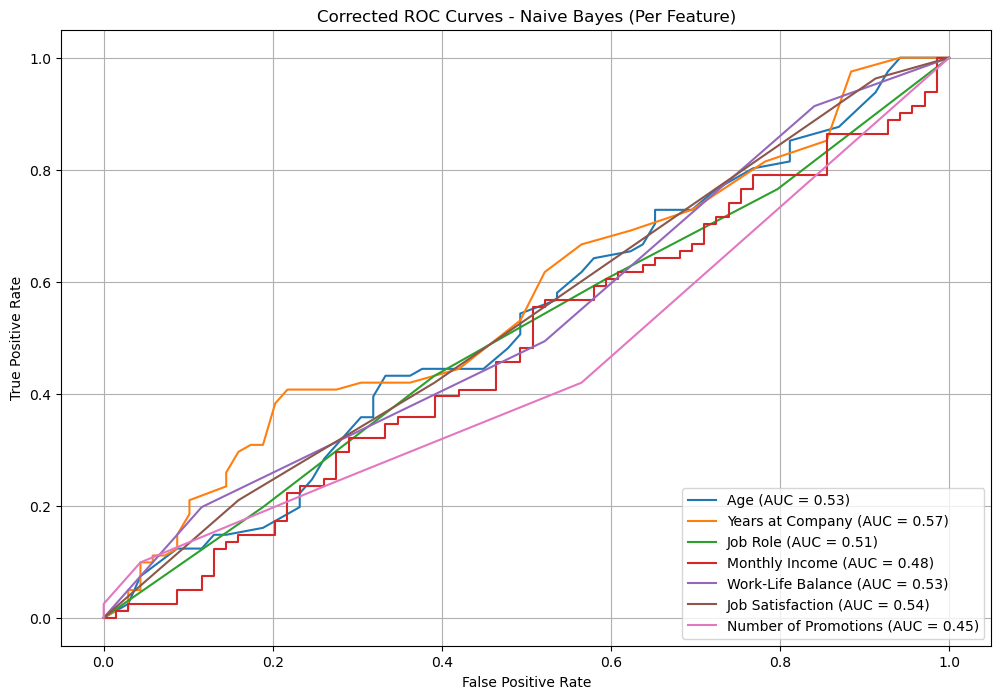

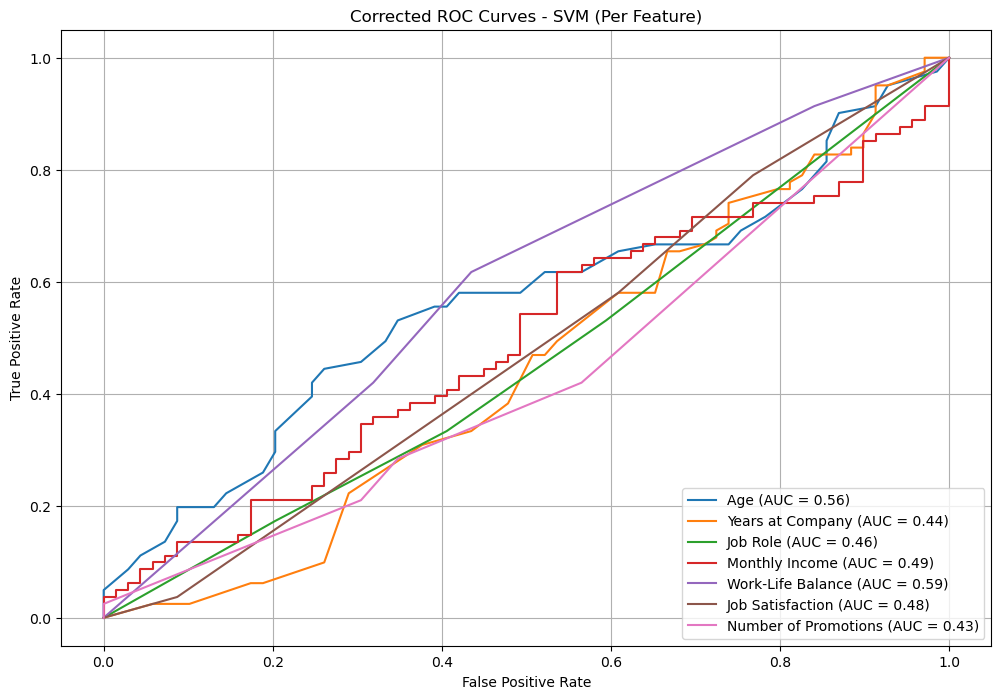

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/Users/jawadzaarif7/Desktop/38157/500 rows final.csv')

# Convert categorical features to numerical using LabelEncoder
label_encoders = {}
for column in ['Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Attrition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop(columns=['Employee ID', 'Attrition'])
y = data['Attrition']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- Naive Bayes ROC Curve Generation ---
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    # Use only one feature at a time for model training
    X_train_feature = X_train[:, i].reshape(-1, 1)
    X_test_feature = X_test[:, i].reshape(-1, 1)

    # Train and predict with Naive Bayes
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_train_feature, y_train)
    y_prob_nb = naive_bayes.predict_proba(X_test_feature)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{X.columns[i]} (AUC = {roc_auc:.2f})')

plt.title('Corrected ROC Curves - Naive Bayes (Per Feature)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --- SVM ROC Curve Generation ---
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    # Use only one feature at a time for model training
    X_train_feature = X_train[:, i].reshape(-1, 1)
    X_test_feature = X_test[:, i].reshape(-1, 1)

    # Train and predict with SVM
    svm_model = SVC(probability=True, random_state=42)
    svm_model.fit(X_train_feature, y_train)
    y_prob_svm = svm_model.predict_proba(X_test_feature)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{X.columns[i]} (AUC = {roc_auc:.2f})')

plt.title('Corrected ROC Curves - SVM (Per Feature)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/Users/jawadzaarif7/Desktop/38157/500 rows final.csv')

# Convert categorical features to numerical using LabelEncoder
label_encoders = {}
for column in ['Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Attrition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop(columns=['Employee ID', 'Attrition'])
y = data['Attrition']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- Naive Bayes ROC Curve Generation ---
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    # Use only one feature at a time for model training
    X_train_feature = X_train[:, i].reshape(-1, 1)
    X_test_feature = X_test[:, i].reshape(-1, 1)

    # Train and predict with Naive Bayes
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_train_feature, y_train)
    y_prob_nb = naive_bayes.predict_proba(X_test_feature)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{X.columns[i]} (AUC = {roc_auc:.2f})')

plt.title('Corrected ROC Curves - Naive Bayes (Per Feature)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('/Users/jawadzaarif7/Desktop/38157/Naive_Bayes_ROC_Curves.png')
plt.close()

# --- SVM ROC Curve Generation ---
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    # Use only one feature at a time for model training
    X_train_feature = X_train[:, i].reshape(-1, 1)
    X_test_feature = X_test[:, i].reshape(-1, 1)

    # Train and predict with SVM
    svm_model = SVC(probability=True, random_state=42)
    svm_model.fit(X_train_feature, y_train)
    y_prob_svm = svm_model.predict_proba(X_test_feature)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{X.columns[i]} (AUC = {roc_auc:.2f})')

plt.title('Corrected ROC Curves - SVM (Per Feature)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('/Users/jawadzaarif7/Desktop/38157/SVM_ROC_Curves.png')
plt.close()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/Users/jawadzaarif7/Desktop/38157/500 rows final.csv')

# Convert categorical features to numerical using LabelEncoder
label_encoders = {}
for column in ['Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Attrition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop(columns=['Employee ID', 'Attrition'])
y = data['Attrition']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# --- Naive Bayes Performance Curve ---
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_prob_nb = naive_bayes.predict_proba(X_test)[:, 1]
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_prob_nb)
average_precision_nb = average_precision_score(y_test, y_prob_nb)

plt.figure(figsize=(12, 8))
plt.plot(recall_nb, precision_nb, label=f'Naive Bayes (AP = {average_precision_nb:.2f})', linewidth=2)

# --- SVM Performance Curve (with polynomial kernel and hyperparameter optimization) ---
svm_parameters = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['poly']}
svm_model = GridSearchCV(SVC(probability=True, class_weight='balanced', random_state=42), svm_parameters, cv=5)
svm_model.fit(X_train, y_train)

# Best SVM model after GridSearch
best_svm = svm_model.best_estimator_
y_prob_svm = best_svm.predict_proba(X_test)[:, 1]
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
average_precision_svm = average_precision_score(y_test, y_prob_svm)

plt.plot(recall_svm, precision_svm, label=f'SVM (AP = {average_precision_svm:.2f}, Best Params: {svm_model.best_params_})', linewidth=2)

# Final Plot Adjustments
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()